In [1]:
%%capture
%pip install pandas matplotlib seaborn sklearn

In [2]:
import sys
import logging
import pandas as pd
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 7))

import seaborn as sns
print("Setup Complete")

Setup Complete


<Figure size 2000x700 with 0 Axes>

Loading the data

In [3]:
train_path = "data/train.csv"
test_path = "data/test.csv"
sample_submission_path = "data/sample_submission.csv"

train_data = pd.read_csv(train_path, index_col="id", parse_dates=True)
test_data = pd.read_csv(test_path, index_col="id", parse_dates=True)
sample_submission = pd.read_csv(sample_submission_path, index_col="id", parse_dates=True)
print("Loaded data successfully")

Loaded data successfully


### __Exploratory Data Analysis__

In [5]:
train_data.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [6]:
test_data.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
id,,,,,,,,,,,,,,,,,,,,,
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
sample_submission.head()

,prognosis
id,
707,Dengue Zika Japanese_encephalitis
708,Dengue Zika Japanese_encephalitis
709,Dengue Zika Japanese_encephalitis
710,Dengue Zika Japanese_encephalitis
711,Dengue Zika Japanese_encephalitis


In [8]:
train_data.columns

Index(['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain',
       'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension',
       'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea',
       'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions',
       'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain',
       'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness',
       'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss',
       'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin',
       'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor',
       'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck',
       'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells',
       'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
       'lips_irritation', 'itchiness', 'ulcers',

In [9]:
train_data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_21652\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
sudden_fever,1.000000,0.124397,0.036049,0.097796,0.179499,0.169890,0.062081,0.177029,0.127716,0.191217,...,0.040800,0.069103,0.050103,0.092201,0.068904,-0.249787,-0.252493,-0.237154,0.054514,0.031317
headache,0.124397,1.000000,0.141593,0.101380,0.224059,0.199851,0.187048,0.095692,0.092428,0.098714,...,0.062142,0.099578,0.066726,0.082244,0.122559,-0.094693,-0.104211,-0.079576,0.090628,0.083588
mouth_bleed,0.036049,0.141593,1.000000,0.206715,0.168994,0.158708,0.020446,0.064769,0.058910,0.169697,...,0.101618,0.082888,0.050509,0.076268,0.065368,-0.063708,-0.120258,-0.087354,0.070824,0.063531
nose_bleed,0.097796,0.101380,0.206715,1.000000,0.177816,0.118444,0.084063,0.105565,0.117855,0.158394,...,0.061767,0.055925,0.031747,0.059443,0.078401,-0.166040,-0.175352,-0.159009,0.044286,0.053200
muscle_pain,0.179499,0.224059,0.168994,0.177816,1.000000,0.133019,0.025560,0.058896,0.070327,0.104801,...,0.013083,0.050311,0.040824,0.021066,0.019697,-0.113089,-0.135370,-0.125176,0.017445,0.058868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
itchiness,-0.249787,-0.094693,-0.063708,-0.166040,-0.113089,-0.094693,-0.095462,-0.142532,-0.148951,-0.063027,...,-0.013086,0.032357,0.136763,0.034320,0.066756,1.000000,0.794532,0.797413,0.186650,0.171625
ulcers,-0.252493,-0.104211,-0.120258,-0.175352,-0.135370,-0.136579,-0.121710,-0.159245,-0.155290,-0.099780,...,-0.024321,-0.005568,0.068437,0.013725,0.019410,0.794532,1.000000,0.807375,0.106233,0.111886
toenail_loss,-0.237154,-0.079576,-0.087354,-0.159009,-0.125176,-0.104367,-0.139143,-0.142560,-0.150566,-0.085353,...,0.018428,0.063606,0.118208,0.065713,0.055585,0.797413,0.807375,1.000000,0.204949,0.212650
speech_problem,0.054514,0.090628,0.070824,0.044286,0.017445,0.090628,0.029706,-0.003565,0.016690,0.113539,...,0.125197,0.226224,0.315810,0.300479,0.316073,0.186650,0.106233,0.204949,1.000000,0.655888


In [10]:
train_data.describe()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,0.393211,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,0.488809,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: xlabel='prognosis', ylabel='Count'>

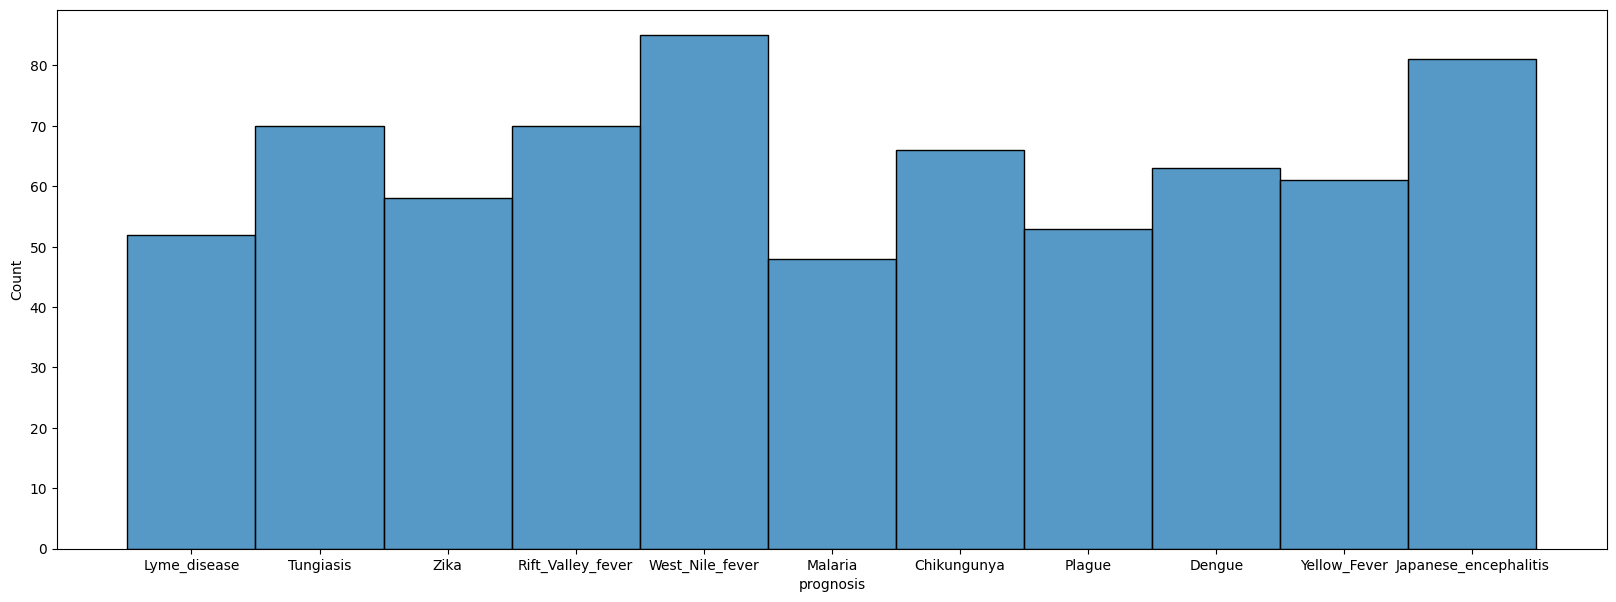

In [11]:
plt.figure(figsize=(20, 7))
sns.histplot(data=train_data["prognosis"])

In [12]:
train_data.isnull().sum()

sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
muscle_pain       0
                 ..
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
prognosis         0
Length: 65, dtype: int64

__Data Transformations__

In [4]:
train_data.dropna(axis=0, inplace=True)

__Building a keras benchmark model__

In [5]:
import keras
from keras import layers
from sklearn.model_selection import train_test_split
keras.__version__

'2.11.0'

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X = train_data.drop("prognosis", axis=1)
y = train_data["prognosis"]

y_ord = ordinal_encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_val, y_train, y_val = train_test_split(X, y_ord, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(565, 64)

In [15]:
benchmark = keras.Sequential([
    layers.Dense(input_shape=(X_train.shape[1],), units=64, activation="linear"),
    layers.Dropout(0.2),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid'),
])

benchmark.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.001) # will use a learning rate scheduler later on

benchmark.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["accuracy"])

history = benchmark.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 1024)              66560     
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 1)                

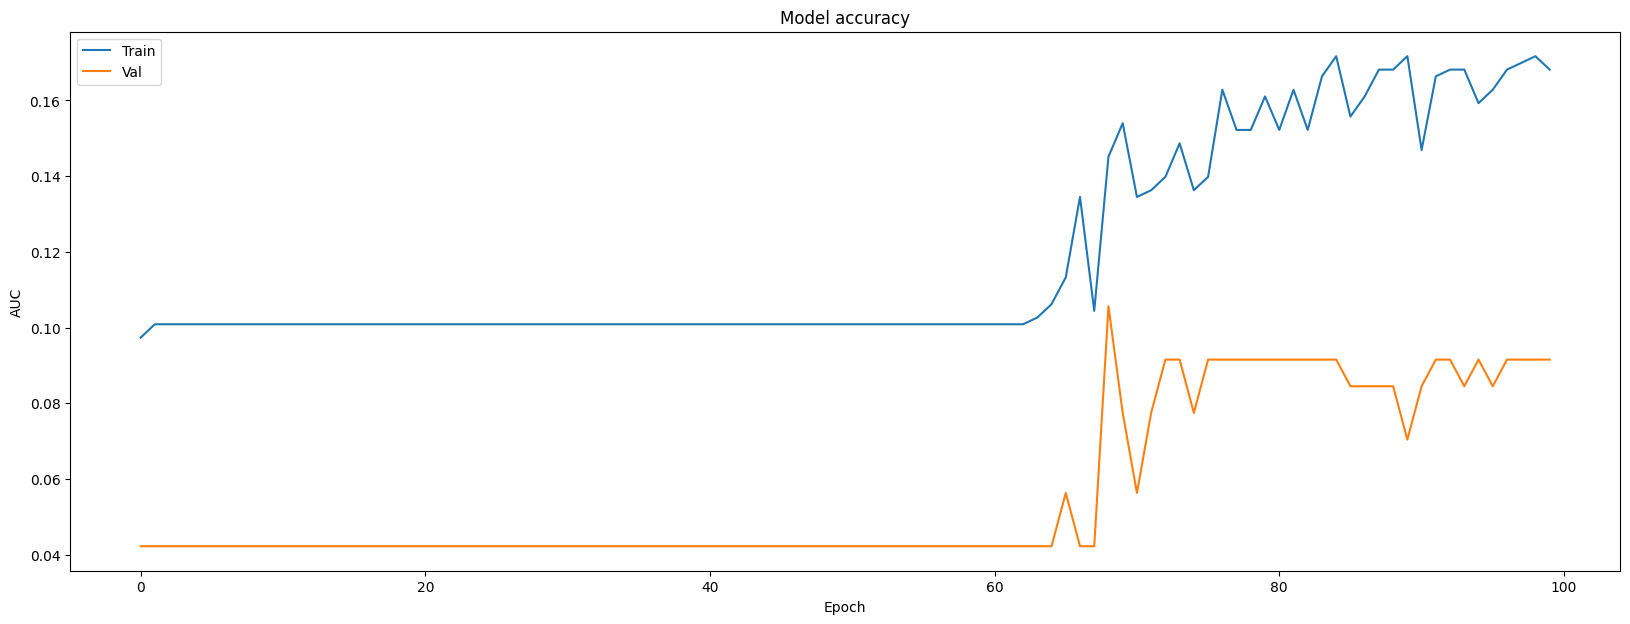

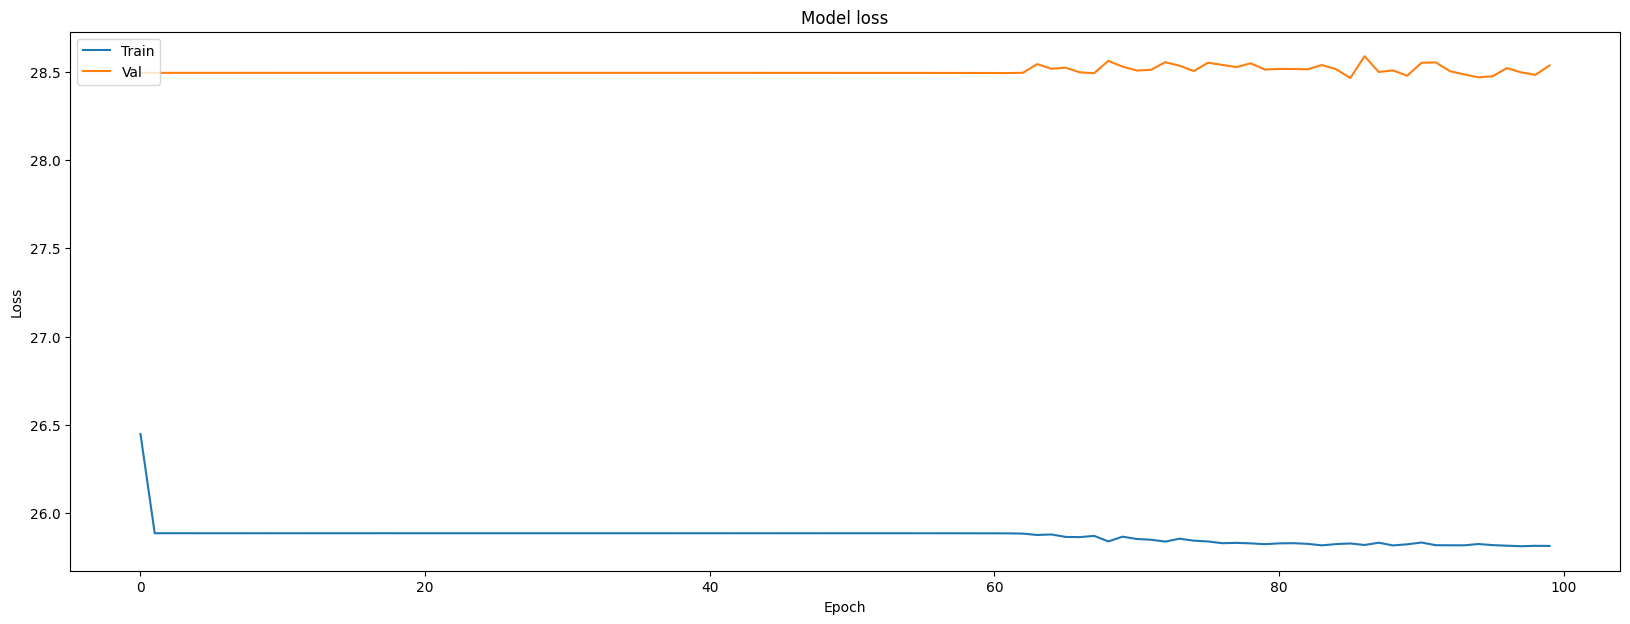

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(20, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()